# Integración Numérica - Aplicación en imágenes

Ya hemos comprobado la utilidad de los métodos de interpolación y de los métodos de detección de cruces por cero para encontrar parámetros de las imágenes que nos son de utilidad, como las partes faltantes y los bordes. ¿Qué pasa cuándo se integra una imagen?

**Actividad 1**

Para la actividad  sigue los pasos:

1. Selecciona una imagen a color de tu preferencia
2. Para cada uno de los canales, encuentra la integral numérica por filas con al menos dos métodos compuestos. Recuerda que el valor de la función evaluada en un punto es equivalente al valor de intensidad del píxel en ese mismo punto. 
3. Cambia los límites de integración (toma segmentos de 5,10,15 y 20 píxeles). Los límites de integración son las x, o sea el índice del píxel. El valor de intensidad es f(x) en ese píxel.
4. Junta los canales nuevamente para que obtengas una nueva imagen.
5. ¿Qué imagen observas para cada opción de segmentos?. ¿Cuál es la diferencia entre las imágenes?

In [1]:
import matplotlib.pyplot as plt #librería de graficación
import numpy as np
import cv2 as cv

In [2]:
imagen = plt.imread('supercow.png')

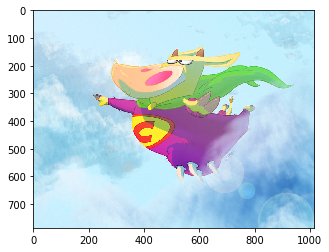

In [3]:
#magen = cv.imread('supercow.jpg')
plt.imshow(imagen)
plt.show()

In [4]:
B = imagen[:, :, 0]
G = imagen[:, :, 1]
R = imagen[:, :, 2]

In [5]:
def simpson3(a, b, y0, y1, y2, h=None):
    h = (b - a)/ 2 if not h else h
    integral = (h/3) * (y0 + y1*4 + y2)
    return integral

In [6]:
def simpson3_compuesto(a, b, M, vector):
    H = b -a
    h = H/(2*M)
    integral = 0
    punto_inicial = a
    for i in range(1, M + 1):
        punto_final = round(a + ((h * i) * 2))
        y0 = vector[punto_inicial]
        y1 = vector[int(round((punto_final - punto_inicial)/2))]
        y2 = vector[punto_final]
        integral += simpson3(punto_inicial, punto_final, y0, y1, y2, h=h)
        punto_inicial = punto_final
    return integral

In [7]:
def trapecio_simple(a, b, y0, y1, h=None):
    h = b - a if not h else h
    integral = h/2 * (y0 + y1)
    return integral

In [8]:
def trapecio_compuesto(a, b, M, vector):
    H = b - a
    h = H/M
    integral = 0
    punto_inicial = a
    for i in range(1, M + 1):
        punto_final = a + (h * i)
        punto_final = round(punto_final)
        y0 = vector[punto_inicial]
        y1 = vector[punto_final]
        integral += trapecio_simple(punto_inicial, punto_final, y0, y1, h=h)
        punto_inicial = punto_final    
    return integral

In [9]:
def apply_integration(canal, limpio, lim_sup):
    for row in range(0, np.shape(canal)[0]):
        for column in range(0, np.shape(canal)[1] + lim_sup, lim_sup):
            try:
                resultado_integral = trapecio_compuesto(column-lim_sup, column,5,canal[row])
            except IndexError:
                resultado_integral = trapecio_compuesto(column-lim_sup, column-lim_sup,5,canal[row])
            limpio[row][column-lim_sup:column] = resultado_integral/lim_sup

In [10]:
def apply_integration_simpson(canal, limpio, lim_sup):
    for row in range(0, np.shape(canal)[0]):
        for column in range(0, np.shape(canal)[1] + lim_sup, lim_sup):
            try:
                resultado_integral = simpson3_compuesto(column-lim_sup, column, 2,canal[row])
            except IndexError:
                resultado_integral = simpson3_compuesto(column-lim_sup, column-lim_sup, 2,canal[row])
            limpio[row][column-lim_sup:column] = resultado_integral/lim_sup

In [11]:
R_limpia = np.zeros(np.shape(R))
B_limpia = np.zeros(np.shape(B))
G_limpia = np.zeros(np.shape(G))

In [12]:
apply_integration(R, R_limpia, 2)

In [13]:
apply_integration(B, B_limpia, 20)

In [14]:
apply_integration(G, G_limpia, 20)

In [15]:
zipped = np.dstack((B_limpia, G_limpia, R_limpia))

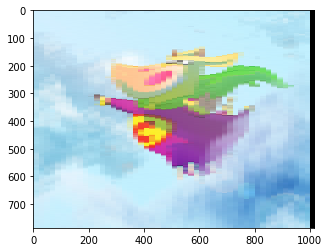

In [16]:
plt.imshow(zipped) #visualización de la imagen
plt.show()

In [17]:
R_limpia_s = np.zeros(np.shape(R))
B_limpia_s = np.zeros(np.shape(B))
G_limpia_s = np.zeros(np.shape(G))

In [18]:
apply_integration_simpson(R, R_limpia_s, 20)
apply_integration_simpson(B, B_limpia_s, 20)
apply_integration_simpson(G, G_limpia_s, 20)

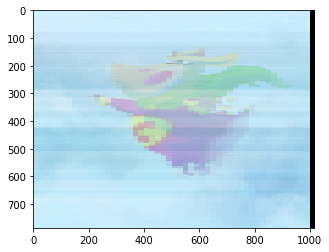

In [19]:
zipped_simpson = np.dstack((B_limpia_s, G_limpia_s, R_limpia_s))
plt.imshow(zipped_simpson) #visualización de la imagen
plt.show()